## Installations

In [10]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib

## Import Needed Packages

In [11]:
import pandas as pd
import sklearn
from sklearn.model_selection import cross_val_score

## Loading Iris Dataset
I have converted the Iris dataset file into a CSV format to facilitate the conversion into tabular data.

In [12]:
data = pd.read_csv("iris.csv", names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])

In [13]:
data

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [14]:
y = data['class'] #The output 'y' is the iris species name (class)

In [15]:
x = data.drop('class', axis=1) #The input 'x' contains the feature columns (excluding 'class')
x

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Decision Tree Classifier
I have used cross-validation to ensure generality leading to better optimization

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
score = cross_val_score(dt_clf, x, y, cv=4)
print(f"Decision Tree Classifier accuracy: {score.mean()}")

Decision Tree Classifier accuracy: 0.9599928876244666


## Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
score = cross_val_score(rf_clf, x, y, cv=4)
print(f"Random Forest Classifier accuracy: {score.mean()}")

Random Forest Classifier accuracy: 0.9667496443812233


## ANN Classifier
I have changed the max_iter to 10000 as the optimization was not converged yet with the default.

In [27]:
from sklearn.neural_network import MLPClassifier
MLP_clf = MLPClassifier(max_iter = 10000)
score = cross_val_score(MLP_clf, x, y, cv=4)
print(f"ANN Classifier accuracy: {score.mean()}")

ANN Classifier accuracy: 0.9733285917496444


## Differences in The Above Obtained Accuracy Scores
According to the above results, Random Forest classifier led to higher accuracy than the Tree classifier. Then, ANN led to even higher accuracy. 

This observation can be due to the following:

Decison trees impose high variance and low randomness, making them more expected to overfiting as they closely build their structure based on the training data. This is because of the high variance which means the tree are sensitive to small fluctuations in the training dataset, so they try to establish an overly complicated model to extremely fit the training data, especially that the chosen data is small in size. This leads to overfitting, consequently, bad preformance on testing data. 

On the other hand, Random Forests are an ensemble of multiple trees where each tree is trained on different subset of the data which increase randomness and less expected to overfit the trained data. Phrased differently, Random Forests does better at generalization, have more accurate performance on future/new test data.

While for ANNs, it stands as the most accurate classification out of the three in most cases. This is due to the mix of rules/mathematical operations and parameters such as weights that can be tuned and adjusted during the training leading to better predictions. Unlike decision trees, ANNs are not binary decision based, they have more complex features. Also, similar to the Random Forest, the ANNs select random small subsets of data to improve generalization and prevent overfitting. Also, worth mentioning, ANNs uses a hyperparameter called Activation function that is applied at each node which helps the neural network to learn nonlinear patterns in the dataset.   


## Plotting Tree

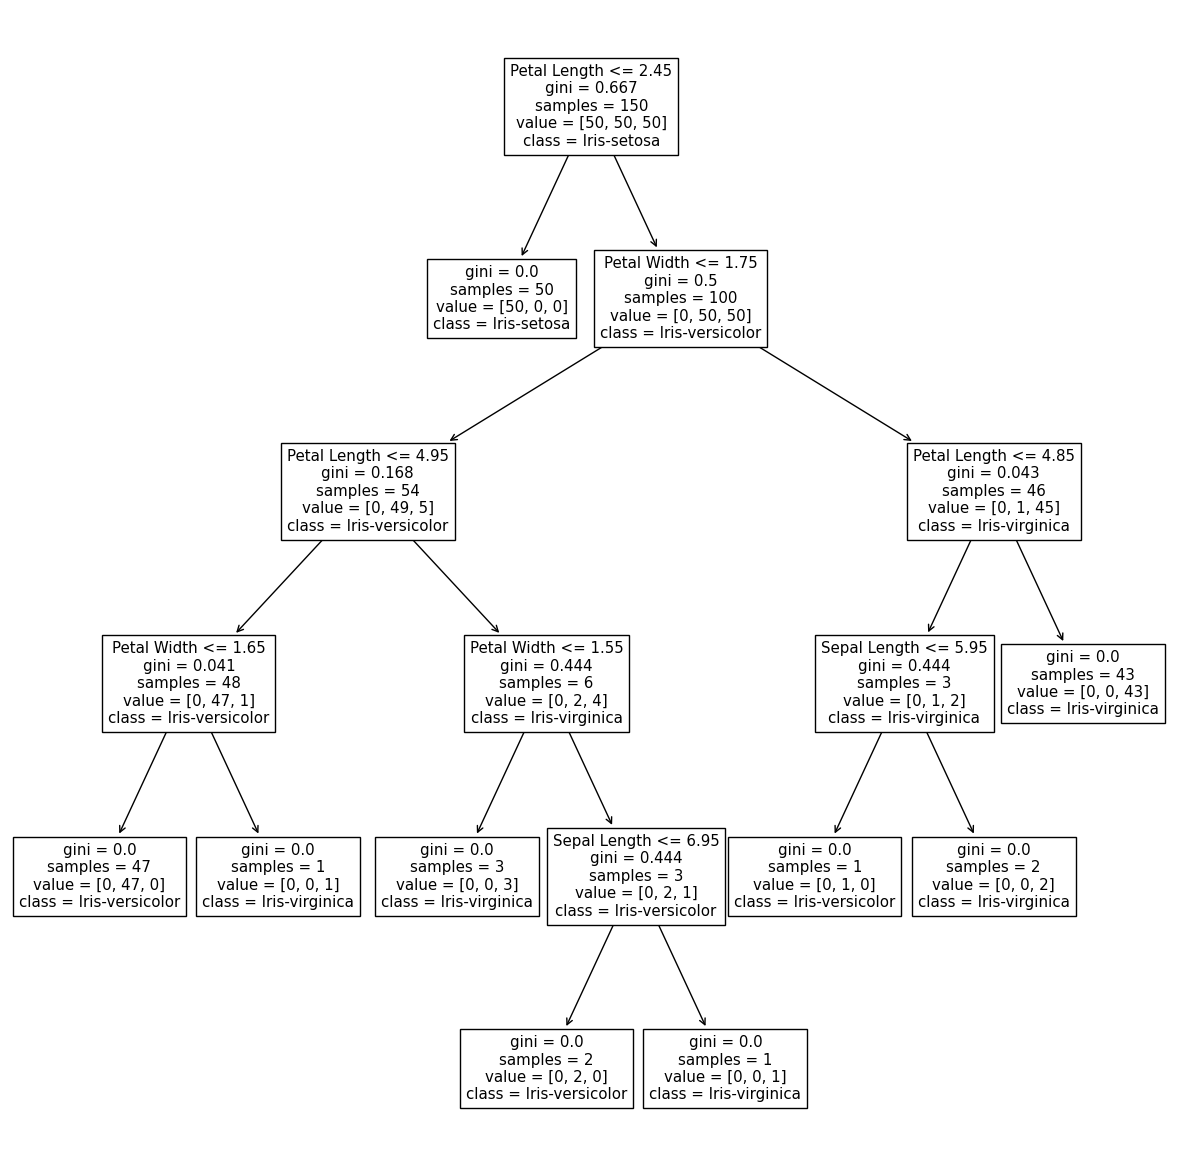

In [68]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
dt_clf.fit(x,y) 
fig, ax = plt.subplots(figsize=(15,15))
plot_tree(dt_clf, feature_names=["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"], ax=ax, class_names=dt_clf.classes_.tolist())
fig.savefig('fig')

As shown in the figure, the tree keeps on branching until it reaches gini of 0 leading to 1 accuracy for each class/category. The tree is spliting to branches based on main if condition and afterwards it has nested condition within branches. At the first node, it shows how all the Iris-setosa are succesfully categorized. Then, it shows how it checks the values and if there is two categories, it splits again until it reaches values of one category and gini = 0. The tree is somehow deep as there was no restriction on its max depth.This is shown how some of the nodes include only one Iris in the category which demonstrate how it might be prone to overfitting train data. 